In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
density_idm_3300=np.load('Main3300_merge1250average_density2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')

flow_idm_3300_9728=np.load('9728/Main3300_merge1250average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')
flow_idm_3300_9575=np.load('9575/Main3300_merge1250average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')
flow_idm_3300_9832=np.load('9832/Main3300_merge1250average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')
flow_idm_3300_9813=np.load('9813/Main3300_merge1250average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')




In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_fundamental_diagram(*data_sets):
    plt.figure(figsize=(6, 4))
    
    for data, target_speed, label in data_sets:
        density_data, flow_data = zip(*data)
        
        def func(x, a, b, c, d):
            return a * x**3 + b * x**2 + c * x + d
        
        params, covariance = curve_fit(func, density_data, flow_data)
        a, b, c, d = params
        x_fit = np.linspace(min(density_data), max(density_data), 100)
        y_fit = func(x_fit, a, b, c, d)
        
        color = 'blue' if label == 'idm' else 'red'
        color= 'blue' if label=='cooperation=0' else 'red'
        color = 'blue' if label == 'stra=-1' else ('green' if label == 'stra=0.5' else 'red')

        
        plt.scatter(density_data, flow_data, label='Target Speed: {}m/s - {}'.format(target_speed, label), s=10, color=color)
    
    plt.xlabel('Density (veh/km)')
    plt.ylabel('Flow (veh/h)')
    plt.xlim(0, 180)
    plt.ylim(0, 6000)
    plt.title('Fundamental Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

data_l_30_idm=list(zip(1000*density_idm_3300,18*flow_idm_3300_9728))





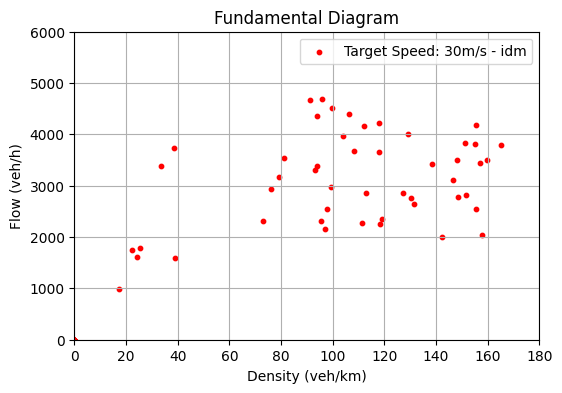

In [7]:
plot_fundamental_diagram((1*np.array(data_l_30_idm),30,'idm'))

Text(0, 0.5, 'Flow (veh/h)')

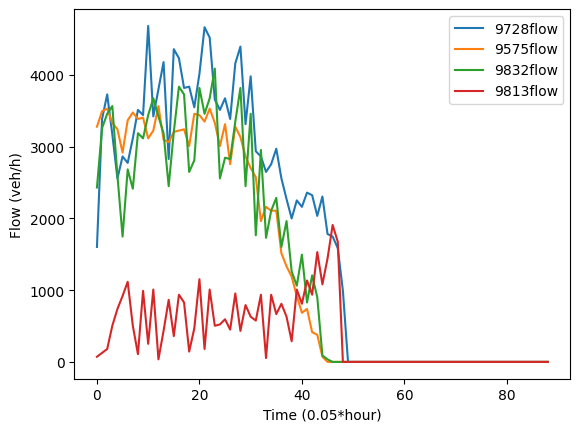

In [8]:
plt.plot(18*np.array(flow_idm_3300_9728),label='9728flow')
plt.plot(18*np.array(flow_idm_3300_9575),label='9575flow')
plt.plot(18*np.array(flow_idm_3300_9832),label='9832flow')
plt.plot(18*np.array(flow_idm_3300_9813),label='9813flow')

# plt.plot(3*np.array(flow_data_cop05),label='cooperation=0.5')
# plt.plot(3*np.array(flow_data_cop1),label='cooperation=1')

# 修改横轴刻度
# plt.xticks(np.arange(len(flow_data_idm)), new_ticks)

plt.xlabel('Time (0.05*hour)')
plt.legend()
plt.ylabel('Flow (veh/h)')

In [8]:
import xml.etree.ElementTree as ET
coops=[0,0.2,0.4,0.6,0.8,1]
for coop in coops:
    xml_file_path = f"/home/tianyu/code/SUMO-changing-lane-agent/results/stat{coop}.xml"

    # Parse the XML file
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Find the relevant elements
    vehicle_trip_stats = root.find(".//vehicleTripStatistics")

    # Extract values from the elements
    total_travel_time = float(vehicle_trip_stats.attrib["totalTravelTime"])
    total_depart_delay = float(vehicle_trip_stats.attrib["totalDepartDelay"])

    # Calculate the sum
    total_time = total_travel_time + total_depart_delay

    # Print or use the total time as needed
    print('coop value:',coop)
    print("Total Travel Time:", total_travel_time)
    print("Total Depart Delay:", total_depart_delay)
    print("Total Time (Travel Time + Depart Delay):", total_time)


coop value: 0
Total Travel Time: 2916903.1
Total Depart Delay: 9494913.3
Total Time (Travel Time + Depart Delay): 12411816.4
coop value: 0.2
Total Travel Time: 4389972.7
Total Depart Delay: 5775833.6
Total Time (Travel Time + Depart Delay): 10165806.3
coop value: 0.4
Total Travel Time: 4472820.5
Total Depart Delay: 3819947.3
Total Time (Travel Time + Depart Delay): 8292767.8
coop value: 0.6
Total Travel Time: 3935608.5
Total Depart Delay: 3133491.1
Total Time (Travel Time + Depart Delay): 7069099.6
coop value: 0.8
Total Travel Time: 4070589.2
Total Depart Delay: 3066433.2
Total Time (Travel Time + Depart Delay): 7137022.4
coop value: 1
Total Travel Time: 3862256.1
Total Depart Delay: 3670409.8
Total Time (Travel Time + Depart Delay): 7532665.9
